In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2
import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
import os
import random
# bool(random.getrandbits(1))

2024-07-24 14:39:12.309804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 14:39:12.333447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 14:39:12.339369: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 14:39:12.356206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 14:39:13.797296: W tensorflow/compiler/tf2

In [2]:
#importing data
classes_train = pd.read_csv('../data/train/_classes.csv')
classes_test = pd.read_csv('../data/test/_classes.csv')
classes_valid = pd.read_csv('../data/valid/_classes.csv')

pics_train = []
pics_valid = []
pics_test = []


for filename in classes_train['filename']:
    img = cv2.imread('../data/train/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pics_train.append(img)

for filename in classes_valid['filename']:
    img = cv2.imread('../data/valid/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pics_valid.append(img)

for filename in classes_test['filename']:
    img = cv2.imread('../data/test/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pics_test.append(img)


In [3]:
pics_train = np.array(pics_train)
pics_valid = np.array(pics_valid)
pics_test = np.array(pics_test)

In [4]:
pics_test[0].shape

(360, 640)

In [5]:
def hard_crop(image):
    return image[:,:,100:image.shape[2]-100]

In [6]:
train_cropped = hard_crop(pics_train)
valid_cropped = hard_crop(pics_valid)
test_cropped = hard_crop(pics_test)

# X = np.concatenate((train_cropped, valid_cropped, test_cropped), axis=0)


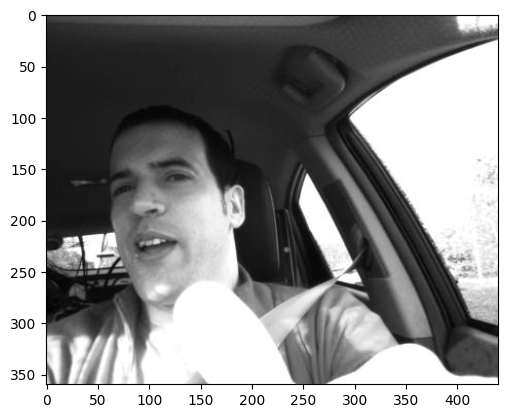

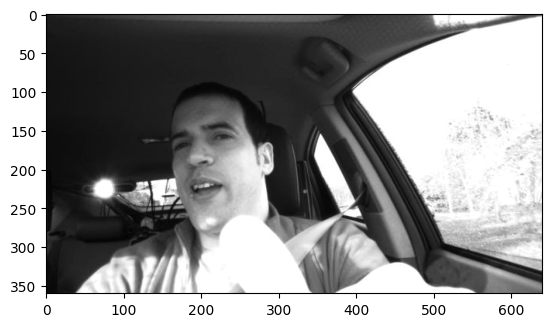

In [7]:
rand_int = random.randint(0, len(train_cropped))
plt.imshow(train_cropped[rand_int], cmap='gray')
#wait 3 sec
plt.show()
plt.imshow(pics_train[rand_int], cmap='gray')
plt.show()

In [8]:
cv2.imwrite('../report_max/vXXX/content/test1.jpg', pics_train[rand_int])
cv2.imwrite('../report_max/vXXX/content/test2.jpg', train_cropped[rand_int])

True

In [9]:
train_img = []
valid_img = []
test_img = []

for pic in tqdm.tqdm(range(len(train_cropped))):
    img = cv2.resize(train_cropped[pic], (120,100))
    train_img.append(img)

for pic in tqdm.tqdm(range(len(valid_cropped))):
    img = cv2.resize(valid_cropped[pic], (120,100))
    valid_img.append(img)

for pic in tqdm.tqdm(range(len(test_cropped))):
    img = cv2.resize(test_cropped[pic], (120,100))
    test_img.append(img)

# train_img = np.array(train_img)
# valid_img = np.array(valid_img)
# test_img = np.array(test_img)

X = np.concatenate((train_img, test_img, valid_img), axis=0)


100%|██████████| 985/985 [00:00<00:00, 33701.42it/s]


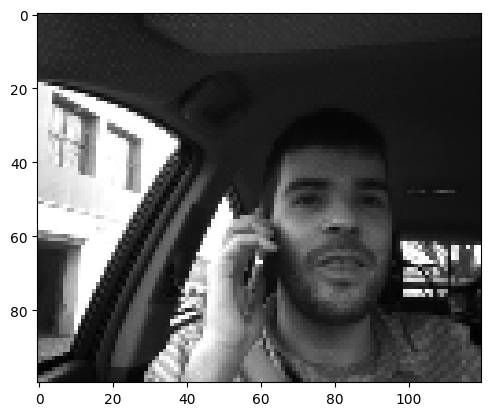

In [10]:
plt.imshow(X[0], cmap='gray')

In [11]:
all_data_merged = pd.concat([classes_train, classes_test, classes_valid])
print(all_data_merged[" DangerousDriving"].sum())
print(all_data_merged[" SafeDriving"].sum())
print(all_data_merged[" Yawn"].sum())
print(all_data_merged[" Distracted"].sum())
print(all_data_merged[" Drinking"].sum())
print(all_data_merged[" SleepyDriving"].sum())

ratio_dangerous = all_data_merged[" DangerousDriving"].sum() / all_data_merged[" SafeDriving"].sum()
ratio_yawn = all_data_merged[" Yawn"].sum() / all_data_merged[" SafeDriving"].sum()
ratio_distracted = all_data_merged[" Distracted"].sum() / all_data_merged[" SafeDriving"].sum()
ratio_drinking = all_data_merged[" Drinking"].sum() / all_data_merged[" SafeDriving"].sum()
ratio_sleepy = all_data_merged[" SleepyDriving"].sum() / all_data_merged[" SafeDriving"].sum()

pics_per_pic = [1, 11, 2, 14, 6]


4642
6180
546
2080
428
979


(100, 120)
True


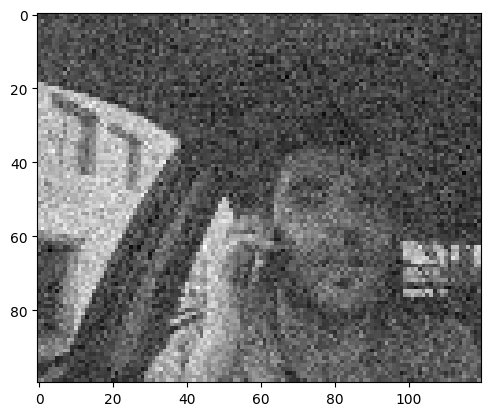

In [12]:
def add_noise(image):
    # Add Gaussian noise
    row, col = image.shape
    print(image.shape)
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))*100
    noisy_image = image + gauss
    
    # Clip the values to be in the valid range [0, 1]
    # noisy_image = np.clip(noisy_image, 0, 1)
    
    return noisy_image

test_noisy = add_noise(X[0])
plt.imshow(test_noisy, cmap='gray')
# plt.imshow(train_cropped[0], cmap='gray')
print(bool(random.getrandbits(1)))

In [13]:
#generate random number from 50 to 150
def random_number():
    return random.randint(50, 150)


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def add_noise(image, random_number):
    # Add Gaussian noise
    row, col = image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))*random_number
    noisy_image = image + gauss
    
    # Clip the values to be in the valid range [0, 1]
    # noisy_image = np.clip(noisy_image, 0, 1)
    
    return noisy_image


def augment_images(images, num_augmentations):
    """
    Augment images using ImageDataGenerator

    Args:
        images (numpy.ndarray): Images to augment
    
    Returns:
        numpy.ndarray: Augmented images
    """
    train_datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.2,
        height_shift_range=0.05,  # Increased height shift range
        shear_range=0.3,
        zoom_range=0.2,
        vertical_flip=True,
        fill_mode='nearest'
    )
    augmented_images = []
    for image in images:
        # print('image fetched')
        # print('shape before', image.shape)
        image = np.expand_dims(image, 0)
        # print('shape after', image.shape)
        # print('image fetched')
        i = 0
        for i in range(num_augmentations):
            # print(f'loop {i} / {num_augmentations}')
            if random.choice([True, False]):
                # print('True')
                augmented_image = train_datagen.random_transform(image)
                augmented_images.append(augmented_image)
                i += 1
            else:
                # print('False')
                rand = random.randint(20, 60)
                image_n = np.squeeze(image)
                image_n = add_noise(image_n, rand)
                image_n = np.expand_dims(image_n, 0)
                augmented_images.append(image_n)
                i += 1

            if i >= num_augmentations:
                # print('breaking')
                break
    return augmented_images


# image_test = []
# for i in range(10):
#     image_test.append(augment_images([X[i]], 2))




yawn_augmented = []
yawn_data_augmented = pd.DataFrame(columns=classes_train.columns)
k = 0  # Initialize k before the loop

for i, elem in enumerate(classes_train[" Yawn"]):
    if elem == 1:
        images = augment_images([X[i]], 7)
        yawn_augmented.append(images)
        for j in range(7):
            yawn_data_augmented = pd.concat([yawn_data_augmented, classes_train.iloc[[i]]], ignore_index=True)
            yawn_data_augmented.at[k+j, "filename"] = f"{k+j}"
        k += 7  # Increment k after processing each set of images



#do same for  Distracted, Drinking and SleepyDriving
distracted_augmented = []
distracted_data_augmented = pd.DataFrame(columns=classes_train.columns)
k = 0  # Initialize k before the loop
r = 0
for i, elem in enumerate(classes_train[" Distracted"]):
    if elem == 1:
        images = augment_images([X[i]], 2)
        distracted_augmented.append(images)
        for j in range(2):
            distracted_data_augmented = pd.concat([distracted_data_augmented, classes_train.iloc[[i]]], ignore_index=True)
            distracted_data_augmented.at[k+j, "filename"] = f"{k+j}"
        k += 2  # Increment k after processing each set of images



drinking_augmented = []
drinking_data_augmented = pd.DataFrame(columns=classes_train.columns)
k = 0  # Initialize k before the loop
r = 0
for i, elem in enumerate(classes_train[" Drinking"]):
    if elem == 1:
        images = augment_images([X[i]], 9)
        drinking_augmented.append(images)
        for j in range(9):
            drinking_data_augmented = pd.concat([drinking_data_augmented, classes_train.iloc[[i]]], ignore_index=True)
            drinking_data_augmented.at[k+j, "filename"] = f"{k+j}"
        k += 9  # Increment k after processing each set of images


sleepy_augmented = []
sleepy_data_augmented = pd.DataFrame(columns=classes_train.columns)
k = 0  # Initialize k before the loop
r = 0
for i, elem in enumerate(classes_train[" SleepyDriving"]):
    if elem == 1:
        images = augment_images([X[i]], 5)
        sleepy_augmented.extend(images)
        for j in range(5):
            sleepy_data_augmented = pd.concat([sleepy_data_augmented, classes_train.iloc[[i]]], ignore_index=True)
            sleepy_data_augmented.at[k+j, "filename"] = f"{k+j}"
        k += 5  # Increment k after processing each set of images


# dangerous_augmented = []
# dangerous_data_augmented = pd.DataFrame(columns=classes_train.columns)
# k = 0  # Initialize k before the loop
# r = 0
# for i, elem in enumerate(classes_train[" DangerousDriving"]):
#     if elem == 1:
#         images = augment_images([X[i]], 1)
#         dangerous_augmented.extend(images)
#         for j in range(1):
#             dangerous_data_augmented = pd.concat([dangerous_data_augmented, classes_train.iloc[[i]]], ignore_index=True)
#             dangerous_data_augmented.at[k+j, "filename"] = f"{k+j}"
#         k += 1  # Increment k after processing each set of images





In [15]:
# dangerous_augmented = np.array(dangerous_augmented).reshape(-1, 160, 192)
distracted_augmented = np.array(distracted_augmented).reshape(-1, 100, 120)
drinking_augmented = np.array(drinking_augmented).reshape(-1, 100, 120)
sleepy_augmented = np.array(sleepy_augmented).reshape(-1, 100, 120)
yawn_augmented = np.array(yawn_augmented).reshape(-1, 100, 120)

# print(dangerous_augmented.shape, distracted_augmented.shape, drinking_augmented.shape, sleepy_augmented.shape, yawn_augmented.shape)

In [16]:
#shuffle all augmented data
# np.random.shuffle(dangerous_augmented)
# np.random.shuffle(distracted_augmented)
np.random.shuffle(drinking_augmented)
np.random.shuffle(sleepy_augmented)
np.random.shuffle(yawn_augmented)

In [17]:
# np.random.shuffle(dangerous_augmented)

In [18]:
np.random.shuffle(distracted_augmented)

In [19]:
#augmented_fullim_1 = np.concatenate((X, dangerous_augmented[:1538], distracted_augmented[:4100], drinking_augmented[:5752], sleepy_augmented[:5201], yawn_augmented[:5634]), axis=0)
augmented_fullim_2 = X
# augmented_fullim_2 = np.append(augmented_fullim_2, distracted_augmented[:(920 -  500)], axis=0)
augmented_fullim_2 = np.append(augmented_fullim_2, drinking_augmented[:(2572 - 1000)], axis=0)
augmented_fullim_2 = np.append(augmented_fullim_2, sleepy_augmented[:(2021 - 1000)], axis=0)
augmented_fullim_2 = np.append(augmented_fullim_2, yawn_augmented[:(2454 - 1000)], axis=0)

# augmented_fullim_2 = np.concatenate((X[:3000], distracted_augmented[:920]), axis=0)
# augmented_fullim_2 = np.concatenate((augmented_fullim_2, drinking_augmented[:2572]), axis=0)
# augmented_fullim_2 = np.concatenate((augmented_fullim_2, sleepy_augmented[:2021]), axis=0)
# augmented_fullim_2 = np.concatenate((augmented_fullim_2, yawn_augmented[:2454]), axis=0)

In [20]:
# augmented_fullim_2 = np.concatenate((augmented_fullim_2, sleepy_augmented[:2021]), axis=0)
# augmented_fullim_2 = np.concatenate((augmented_fullim_2, yawn_augmented[:2454]), axis=0)
print(len(augmented_fullim_2))

18906


In [21]:
# labels_fullim_1 = pd.concat([
#     all_data_merged,  # Original data labels
#     dangerous_data_augmented[:1538], 
#     distracted_data_augmented[:4100], 
#     drinking_data_augmented[:5752], 
#     sleepy_data_augmented[:5201], 
#     yawn_data_augmented[:5634]
# ], ignore_index=True)

labels_fullim_2 = pd.concat([
    all_data_merged,  # Original data labels
    # distracted_data_augmented[:(920 -  500)], 
    drinking_data_augmented[:(2572 - 1000)], 
    sleepy_data_augmented[:(2021 - 1000)], 
    yawn_data_augmented[:(2454 - 1000)],
], ignore_index=True)

print(len(labels_fullim_2), len(augmented_fullim_2))


18906 18906


In [22]:
j = 0
k = 0
indices_to_delete = []
indices_to_delete_2 = []
indices_to_delete_3 = []

for i in labels_fullim_2[" DangerousDriving"]:
    if i == 1:
        if j < 2000:
            j += 1
        else:
            indices_to_delete.append(k)
            j += 1
    k += 1




print(len(indices_to_delete))
# Delete elements using NumPy
labels_fullim_2.drop(labels=indices_to_delete, inplace=True)
augmented_fullim_2 = np.delete(augmented_fullim_2, indices_to_delete, axis=0)
labels_fullim_2.reset_index(drop=True, inplace=True)


j = 0
k = 0
for i in labels_fullim_2[" SafeDriving"]:
    if i == 1:
        if j < 2000:
            j += 1
        else:
            indices_to_delete_2.append(k)
            j += 1
    k += 1

print(len(indices_to_delete_2))
# Delete elements using NumPy
labels_fullim_2.drop(labels=indices_to_delete_2, inplace=True)
augmented_fullim_2 = np.delete(augmented_fullim_2, indices_to_delete_2, axis=0)
labels_fullim_2.reset_index(drop=True, inplace=True)

j = 0
k = 0
for i in labels_fullim_2[" Distracted"]:
    if i == 1:
        if j < 2000:
            j += 1
        else:
            indices_to_delete_3.append(k)
            j += 1
    k += 1

print(len(indices_to_delete_3))
# Delete elements using NumPy
labels_fullim_2.drop(labels=indices_to_delete_3, inplace=True)
augmented_fullim_2 = np.delete(augmented_fullim_2, indices_to_delete_3, axis=0)
labels_fullim_2.reset_index(drop=True, inplace=True)



print(len(labels_fullim_2), len(augmented_fullim_2))

2642
4180
80
12004 12004


In [23]:
print(labels_fullim_2[" DangerousDriving"].sum())
print(labels_fullim_2[" SafeDriving"].sum())
print(labels_fullim_2[" Yawn"].sum())
print(labels_fullim_2[" Distracted"].sum())
print(labels_fullim_2[" Drinking"].sum())
print(labels_fullim_2[" SleepyDriving"].sum())

2000
2000
2000
2000
2000
2000


In [24]:
permutation2 = np.random.permutation(len(augmented_fullim_2))

In [25]:
augmented_fullim_2_shuffled = augmented_fullim_2[permutation2]

In [26]:
labels_fullim_2_shuffled = labels_fullim_2.iloc[permutation2].reset_index(drop=True)

filename             gA_2_s1_ir_face_mp4-6_jpg.rf.143bd9c81918e9d82...
 DangerousDriving                                                    0
 Distracted                                                          0
 Drinking                                                            0
 SafeDriving                                                         1
 SleepyDriving                                                       0
 Yawn                                                                0
Name: 6141, dtype: object

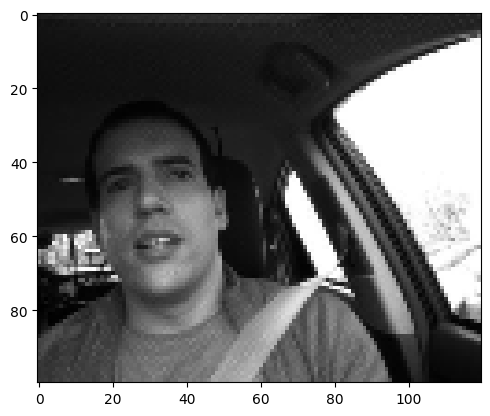

In [27]:
rand = random.randint(0, len(augmented_fullim_2_shuffled))
plt.imshow(augmented_fullim_2_shuffled[rand], cmap='gray')
labels_fullim_2_shuffled.iloc[rand]


In [28]:
# cv2.imwrite('../report_max/vXXX/content/test_aug_2.jpg', augmented_fullim_2_shuffled[rand])
# cv2.imwrite('../report_max/vXXX/content/test2.jpg', train_cropped[rand])

In [29]:
# with open(data_aug_v2, 'w') as f:
#     json.dump(augmented_fullim_2_shuffled, f)

np.save('../data/data_aug_2000.npy', augmented_fullim_2_shuffled)

labels_fullim_2_shuffled.to_csv('../data/labels_aug_2000.csv', index=False)

In [30]:
# arr = np.load('../data/data_aug_v2.npy')

In [31]:
# rand = random.randint(0, len(arr))
# plt.imshow(arr[rand], cmap='gray')
# labels_fullim_2_shuffled.iloc[rand]

In [32]:
train_img = []
valid_img = []
test_img = []

for pic in tqdm.tqdm(range(len(train_cropped))):
    img = cv2.resize(train_cropped[pic], (120,100))
    train_img.append(img)

for pic in tqdm.tqdm(range(len(valid_cropped))):
    img = cv2.resize(valid_cropped[pic], (120,100))
    valid_img.append(img)

for pic in tqdm.tqdm(range(len(test_cropped))):
    img = cv2.resize(test_cropped[pic], (120,100))
    test_img.append(img)

train_img = np.array(train_img)
valid_img = np.array(valid_img)
test_img = np.array(test_img)

100%|██████████| 985/985 [00:00<00:00, 34417.92it/s]


In [33]:


np.save('../data/train_og.npy', train_img)
np.save('../data/valid_og.npy', valid_img)
np.save('../data/test_og.npy', test_img)

In [34]:
#safe the augmented dataframes
# data_aug.to_csv('../data/augmented_data/train.csv', index=False)

In [35]:
# plt.imshow(test_img[34], cmap='gray')

In [36]:


# train_img = train_img.tolist()
# valid_img = valid_img.tolist()
# test_img = test_img.tolist()

# json_train = os.path.join('../data', 'train.json')
# json_valid = os.path.join('../data', 'valid.json')
# json_test =  os.path.join('../data', 'test.json')

# # file_path = os.path.join('data', 'array.json')

# with open(json_train, 'w') as f:
#     json.dump(train_img, f)

# with open(json_valid, 'w') as f:
#     json.dump(valid_img, f)

# with open(json_test, 'w') as f:
#     json.dump(test_img, f)